# 경사하강법 (Gradient Descent)

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [1]:
from IPython.display import YouTubeVideo, Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

### 경사 하강법을 수학으로 쉽게 이해하기

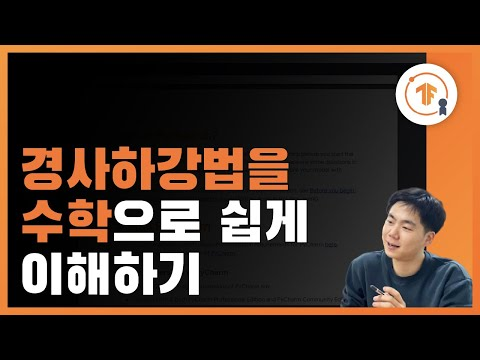

In [3]:
YouTubeVideo('GEdLNvPIbiM')

### 경사 하강법을 활용한 파이썬 코드 구현

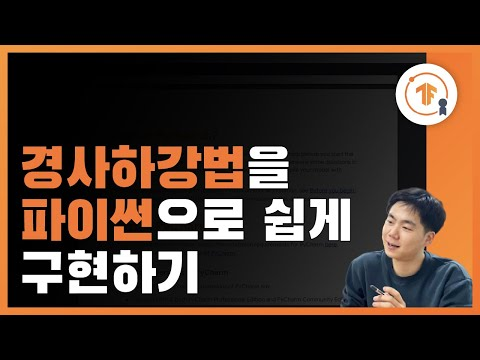

In [4]:
YouTubeVideo('KgH3ZWmMxLE')

## 샘플에 활용할 데이터 셋 만들기

In [5]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

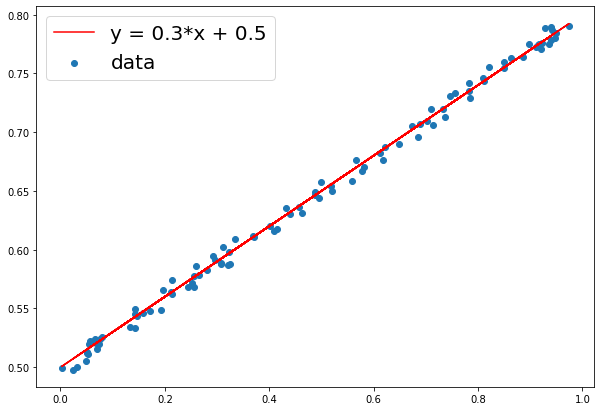

w: 0.3, b: 0.5


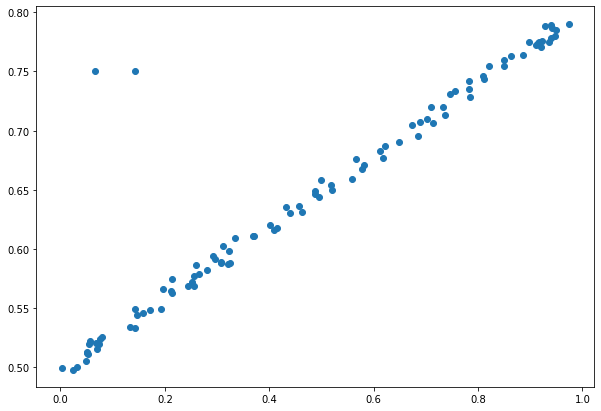

In [6]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)
# 임의로 2개의 outlier를 추가해 보도록 하겠습니다.
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [7]:
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [8]:
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [9]:
error = (y_hat - y) ** 2

## 학습률 (Learning Rate)

In [10]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png')

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [11]:
# 최대 반복 횟수
num_epoch = 5000
# 학습율 (learning_rate)
learning_rate = 0.5

In [12]:
errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.11318, b = 0.09060 error = 1.77929
 5 w = 0.31205, b = 0.49296 error = 0.00114
10 w = 0.30870, b = 0.49858 error = 0.00101
15 w = 0.30464, b = 0.50070 error = 0.00099
20 w = 0.30127, b = 0.50243 error = 0.00098
25 w = 0.29847, b = 0.50386 error = 0.00097
30 w = 0.29616, b = 0.50504 error = 0.00097
35 w = 0.29425, b = 0.50602 error = 0.00096
40 w = 0.29267, b = 0.50684 error = 0.00096
45 w = 0.29136, b = 0.50751 error = 0.00096
50 w = 0.29028, b = 0.50806 error = 0.00096
55 w = 0.28939, b = 0.50852 error = 0.00096
60 w = 0.28865, b = 0.50890 error = 0.00095
65 w = 0.28803, b = 0.50922 error = 0.00095
70 w = 0.28753, b = 0.50948 error = 0.00095
75 w = 0.28711, b = 0.50969 error = 0.00095
80 w = 0.28676, b = 0.50987 error = 0.00095
85 w = 0.28647, b = 0.51002 error = 0.00095
90 w = 0.28623, b = 0.51014 error = 0.00095
95 w = 0.28604, b = 0.51024 error = 0.00095
100 w = 0.28587, b = 0.51032 error = 0.00095
105 w = 0.28574, b = 0.51039 error = 0.00095
110 w = 0.28563, b = 0.51045 e

4225 w = 0.28509, b = 0.51072 error = 0.00095
4230 w = 0.28509, b = 0.51072 error = 0.00095
4235 w = 0.28509, b = 0.51072 error = 0.00095
4240 w = 0.28509, b = 0.51072 error = 0.00095
4245 w = 0.28509, b = 0.51072 error = 0.00095
4250 w = 0.28509, b = 0.51072 error = 0.00095
4255 w = 0.28509, b = 0.51072 error = 0.00095
4260 w = 0.28509, b = 0.51072 error = 0.00095
4265 w = 0.28509, b = 0.51072 error = 0.00095
4270 w = 0.28509, b = 0.51072 error = 0.00095
4275 w = 0.28509, b = 0.51072 error = 0.00095
4280 w = 0.28509, b = 0.51072 error = 0.00095
4285 w = 0.28509, b = 0.51072 error = 0.00095
4290 w = 0.28509, b = 0.51072 error = 0.00095
4295 w = 0.28509, b = 0.51072 error = 0.00095
4300 w = 0.28509, b = 0.51072 error = 0.00095
4305 w = 0.28509, b = 0.51072 error = 0.00095
4310 w = 0.28509, b = 0.51072 error = 0.00095
4315 w = 0.28509, b = 0.51072 error = 0.00095
4320 w = 0.28509, b = 0.51072 error = 0.00095
4325 w = 0.28509, b = 0.51072 error = 0.00095
4330 w = 0.28509, b = 0.51072 erro

**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

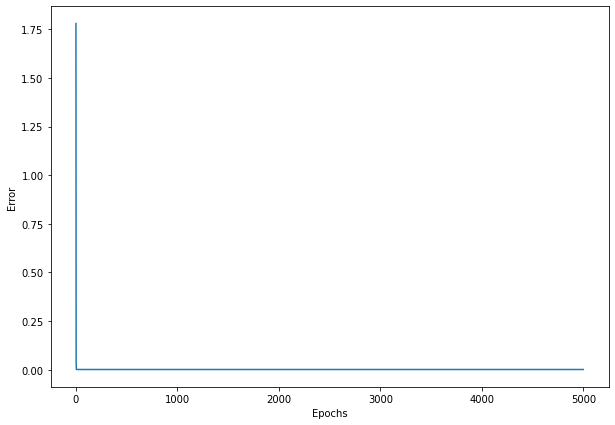

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식

**샘플 데이터**를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [14]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [15]:
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

**다항식을 정의**합니다.

In [16]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

## Gradient Descent 구현 (다항식)

In [17]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b1 = np.random.uniform(low=-1.0, high=1.0)
b2 = np.random.uniform(low=-1.0, high=1.0)
b3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break

    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()

    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)

    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = -0.03503, w2 = 0.46330, w3 = 0.24651, b = -0.30064 error = 0.58171
 5 w1 = 0.02085, w2 = 0.47434, w3 = 0.32718, b = -0.30813 error = 0.01890
10 w1 = 0.05407, w2 = 0.46700, w3 = 0.37882, b = -0.34798 error = 0.01437
15 w1 = 0.08347, w2 = 0.46207, w3 = 0.42293, b = -0.38328 error = 0.01096
20 w1 = 0.10944, w2 = 0.45903, w3 = 0.46067, b = -0.41456 error = 0.00838
25 w1 = 0.13237, w2 = 0.45746, w3 = 0.49300, b = -0.44228 error = 0.00643
30 w1 = 0.15258, w2 = 0.45701, w3 = 0.52075, b = -0.46685 error = 0.00494
35 w1 = 0.17038, w2 = 0.45742, w3 = 0.54460, b = -0.48863 error = 0.00380
40 w1 = 0.18605, w2 = 0.45847, w3 = 0.56512, b = -0.50794 error = 0.00293
45 w1 = 0.19983, w2 = 0.45997, w3 = 0.58281, b = -0.52506 error = 0.00227
50 w1 = 0.21195, w2 = 0.46179, w3 = 0.59807, b = -0.54024 error = 0.00176
55 w1 = 0.22261, w2 = 0.46382, w3 = 0.61126, b = -0.55371 error = 0.00136
60 w1 = 0.23197, w2 = 0.46596, w3 = 0.62266, b = -0.56566 error = 0.00106
65 w1 = 0.24019, w2 = 0.46816, w3 = 0

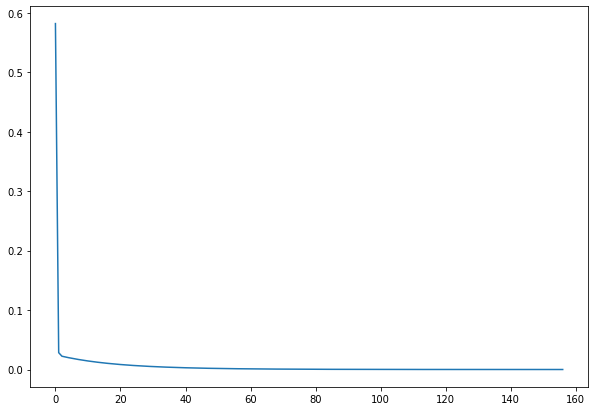

In [18]:
plt.figure(figsize=(10, 7))

plt.plot(errors)

## 가중치 (W1, W2, W3) 값들의 변화량 시각화

`Epoch`가 지남에 따라 어떻게 가중치들이 업데이트 되는지 시각화 해 봅니다.

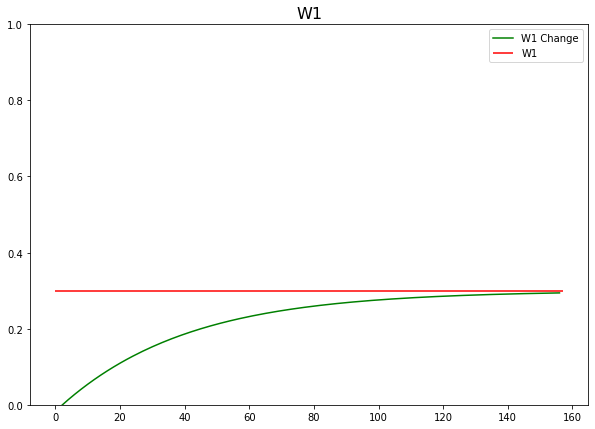

In [19]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

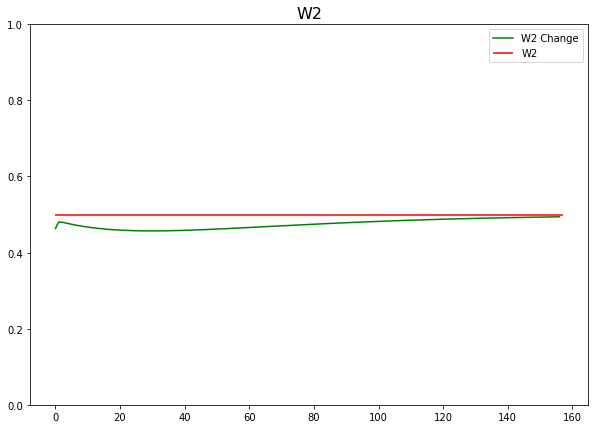

In [20]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

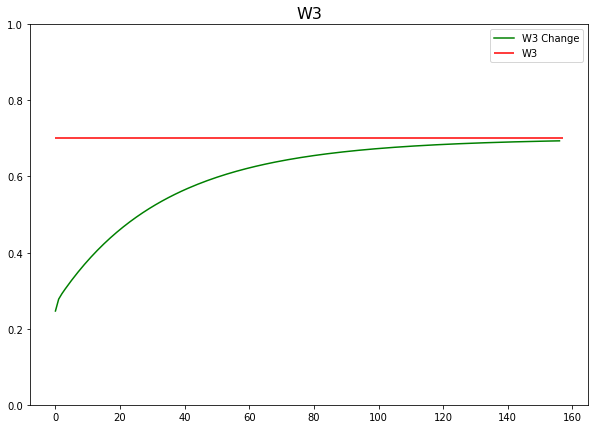

In [21]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()

## 경사하강법을 활용한 SGDRegressor

[SGDRegressor 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [22]:
from sklearn.linear_model import SGDRegressor

In [23]:
model = SGDRegressor(max_iter=5000, tol=1e-5, learning_rate='constant')

In [24]:
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)
x3 = x3.reshape(-1, 1)

In [25]:
X = np.concatenate([x1, x2, x3], axis=1)
X

array([[0.45564125, 0.73867717, 0.50966663],
       [0.42305927, 0.72840352, 0.93443054],
       [0.70718767, 0.42105561, 0.54213406],
       [0.00208417, 0.8399141 , 0.77243212],
       [0.39045097, 0.49175483, 0.30780352],
       [0.79016487, 0.9806587 , 0.04723412],
       [0.97490266, 0.12255436, 0.09843006],
       [0.20103886, 0.19429256, 0.29376878],
       [0.31549369, 0.49792171, 0.82365191],
       [0.9842717 , 0.78937803, 0.79029137],
       [0.72153032, 0.54642426, 0.66711548],
       [0.40960208, 0.76333338, 0.8470338 ],
       [0.47466052, 0.40979825, 0.098475  ],
       [0.97035462, 0.69090105, 0.21466312],
       [0.99234789, 0.93510408, 0.43712531],
       [0.87304256, 0.84134288, 0.45765677],
       [0.39972459, 0.52695676, 0.88488886],
       [0.56065105, 0.7756786 , 0.34862515],
       [0.95833974, 0.83514562, 0.45655574],
       [0.55195764, 0.89917011, 0.17900615],
       [0.222564  , 0.44763556, 0.51337775],
       [0.59956658, 0.74158188, 0.80314465],
       [0.

In [26]:
X.shape

(100, 3)

In [27]:
model.fit(X, y)

SGDRegressor(learning_rate='constant', max_iter=5000, tol=1e-05)

In [28]:
model.coef_

array([0.28102279, 0.47445502, 0.67840663])

In [29]:
model.intercept_

array([-0.62384567])

In [30]:
print("w1 = {:.1f}, w2 = {:.1f}, w3 = {:.1f}, b = {:.1f}".format(model.coef_[0], model.coef_[1], model.coef_[2], model.intercept_[0]))

w1 = 0.3, w2 = 0.5, w3 = 0.7, b = -0.6
